In [5]:
import pandas as pd
from PIL import Image
import numpy as np

In [6]:
data= pd.read_csv('full_clean.csv')

In [7]:
df=data['text_final']

In [8]:
mask=np.array(Image.open('plane.png'))
def transform(val):
    if val==0:
        return 0
    else:
        return 255
transformed_mask=np.ndarray((mask.shape[0],mask.shape[1]),np.int32)
for i in range(len(mask)):
    transformed_mask[i]=list(map(transform,mask[i]))

In [9]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join (list(df.values))
# Create a WordCloud object
wordcloud = WordCloud (background_color="white", max_words=200,mask=transformed_mask, contour_width=.001, contour_color='cyan')
# Generate a word cloud
wordcloud.generate (long_string)
# Visualize the word cloud
wordcloud.to_image()

ModuleNotFoundError: No module named 'wordcloud'

/Users/ray/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


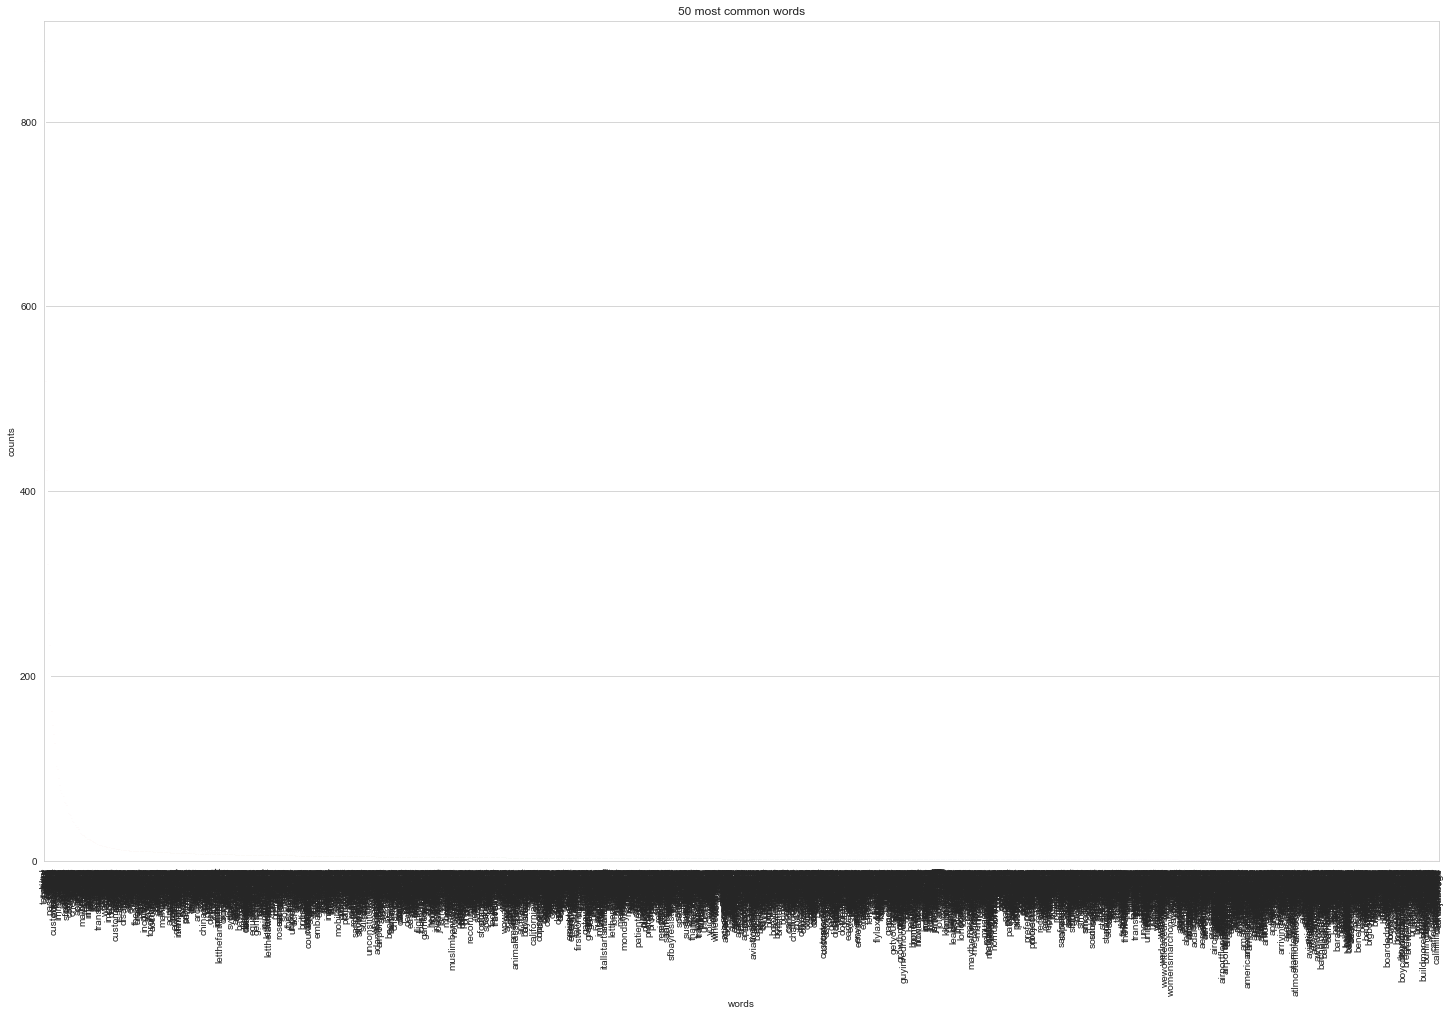

In [10]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:5000]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(25, 25/1.6180))
    plt.subplot(title='50 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 1.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
    return words,counts
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(df)
# Visualise the 10 most common words
words,counts=plot_10_most_common_words(count_data, count_vectorizer)

In [11]:
wordscount=pd.DataFrame()
wordscount['words']=words
wordscount['counts']=counts

In [12]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)
# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words=10):
    words = count_vectorizer.get_feature_names()
    text=[]
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
        text.append((" ".join([words[i] for i in topic.argsort()[:-n_top_words - 1:-1]])))
    return text
# Tweak the two parameters below
number_topics = 30
# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(count_data)
# Print the topics found by the LDA model
print("Topics found via LDA:")
text_lda=print_topics(lda, count_vectorizer)

Topics found via LDA:

Topic #0:
great stand screen horrible experience coffee shop oink late departure

Topic #1:
uber location lovely fantastic information charge assistance government briefly smart

Topic #2:
thank control pass beer pickup departure laptop facility excellent fix

Topic #3:
free stay parking custom drop luggage departure minute connect friendly

Topic #4:
arrival lounge drink expect access large apply bathroom credit departure

Topic #5:
pay taxi confirm local left challenge bonus tax recent exhibit

Topic #6:
short employee desk choice border reach giant outdoor inconvenience difficult

Topic #7:
terminal fast departs carrier wifi option connect thankfully departure shop

Topic #8:
exhibit bart sfomuseum easy hard busy safely lead exhibition breakfast

Topic #9:
gate people minute tsa open wait min fix staff experience

Topic #10:
delay major eat cheer space pizza chill apologize shall goal

Topic #11:
hour delay immigration park care term late regular rent main

To

In [10]:
# %%time
# from pyLDAvis import sklearn as sklearn_lda
# import pickle 
# import pyLDAvis
# import os
# LDAvis_data_filepath = os.path.join('./ldavis_prepared_'+str(number_topics))
# # # this is a bit time consuming - make the if statement True
# # # if you want to execute visualization prep yourself
# if 1 == 1:
#     LDAvis_prepared = sklearn_lda.prepare(lda, count_data, count_vectorizer)
# pyLDAvis.save_html(LDAvis_prepared, './ldavis_prepared_'+ str(number_topics) +'.html')

In [11]:
text=pd.DataFrame(text_lda,columns=['topic'])

In [12]:
#tfidf vectorizer with NMF model
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

tfidf_vectorizer2 = TfidfVectorizer(stop_words='english')
tfid_data2 = tfidf_vectorizer2.fit_transform(df)
n_components = 30
nmf_model = NMF(n_components=n_components,random_state=0)
nmf_model.fit(tfid_data2)

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
  n_components=30, random_state=0, shuffle=False, solver='cd', tol=0.0001,
  verbose=0)

In [13]:
text_nmf=print_topics(nmf_model, tfidf_vectorizer2)


Topic #0:
terminal security open baggage claim food lounge station option access

Topic #1:
delay major expect min inbound connection info maintenance short delayed

Topic #2:
time departure enjoy spend security bag passport free custom friendly

Topic #3:
thanks info experience appreciate enjoy staff layover fantastic connect lyft

Topic #4:
hour late layover luggage departure custom planning control spend close

Topic #5:
great enjoy experience exhibit immigrant option exhibition lounge food restaurant

Topic #6:
people free speak custom amazing park favorite immigration bart customs

Topic #7:
love art exhibit feel sfomuseum amazing livery buy store free

Topic #8:
thank amazing enjoy staff goodness officer care information excellent control

Topic #9:
gate min open water late available departure staff fix seat

Topic #10:
leave late min display water open laptop friendly train bus

Topic #11:
wait min open bag baggage delayed wheelchair custom lyft uber

Topic #12:
stop quick free

In [14]:
fulldata=pd.DataFrame()
fulldata['lda']=text_lda
fulldata['nmf']=text_nmf

In [15]:
fulldata.to_csv('topics_full.csv')

In [16]:
fulldata

,lda,nmf
0,art bar wine truly involve sadly ton pray airi...,terminal security open baggage claim food loun...
1,check info expect layover drop process walk lo...,delay major expect min inbound connection info...
2,terminal easy station airtrain fix option chee...,time departure enjoy spend security bag passpo...
3,lounge business class fine information excelle...,thanks info experience appreciate enjoy staff ...
4,great late super departs cross governor shout ...,hour late layover luggage departure custom pla...
5,time passenger friendly safely laptop chill mo...,great enjoy experience exhibit immigrant optio...
6,gate wait control min open drop available entr...,people free speak custom amazing park favorite...
7,arrive baggage claim major buy lead carousel g...,love art exhibit feel sfomuseum amazing livery...
8,delay hour bart minute run arrive min rest arr...,thank amazing enjoy staff goodness officer car...
9,beautiful connection space row livery interest...,gate min open water late available departure s...


In [17]:
wordscount.to_csv('wordscount.csv')